In [7]:
from itertools import product
import json
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import torch

from sacred.observers import FileStorageObserver

from scripts.run_toy_model import ex

### Grid search over decoder weight decay

In [2]:
ex.observers.append(FileStorageObserver('results'))

decoder_weight_decays = [0.0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5]

for dwd in tqdm(decoder_weight_decays):
    ex.run(config_updates={
        'decoder_weight_decay': dwd,
        'train_steps': int(5e5)
    })

  0%|          | 0/13 [00:00<?, ?it/s]

INFO - run-toy-model - Running command 'run'
INFO - run-toy-model - Started run with ID "2"


  0%|          | 0/500000 [00:00<?, ?it/s]

INFO - run-toy-model - Completed after 0:14:33
INFO - run-toy-model - Running command 'run'
INFO - run-toy-model - Started run with ID "3"


  0%|          | 0/500000 [00:00<?, ?it/s]

INFO - run-toy-model - Completed after 0:14:55
INFO - run-toy-model - Running command 'run'
INFO - run-toy-model - Started run with ID "4"


  0%|          | 0/500000 [00:00<?, ?it/s]

INFO - run-toy-model - Completed after 0:14:57
INFO - run-toy-model - Running command 'run'
INFO - run-toy-model - Started run with ID "5"


  0%|          | 0/500000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

  0%|          | 0/500000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

INFO - run-toy-model - Completed after 0:14:46
INFO - run-toy-model - Running command 'run'
INFO - run-toy-model - Started run with ID "13"


  0%|          | 0/500000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

INFO - run-toy-model - Completed after 0:14:50
INFO - run-toy-model - Running command 'run'
INFO - run-toy-model - Started run with ID "14"


  0%|          | 0/500000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

INFO - run-toy-model - Completed after 0:14:53


In [3]:
len(decoder_weight_decays)

13

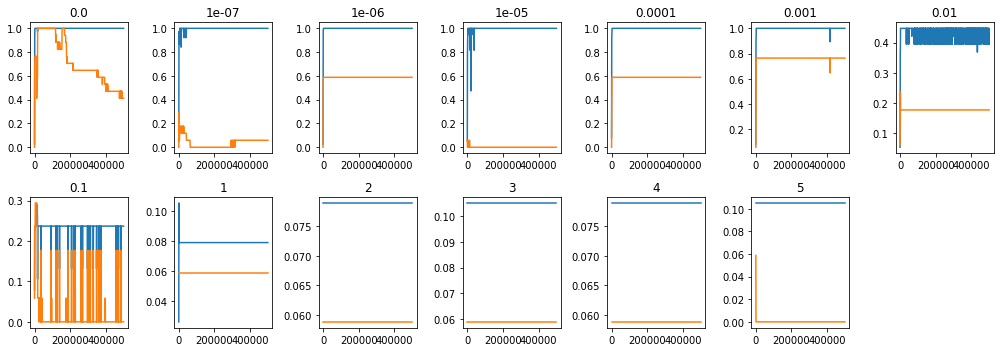

In [15]:
plt.figure(figsize=(14, 5))
for i in range(2, 2 + len(decoder_weight_decays)):
    with open(f"results/{i}/config.json", "r") as f:
        config = json.load(f)
    with open(f"results/{i}/info.json", "r") as f:
        info = json.load(f)
    plt.subplot(2, 7, i-1)
    plt.plot(info['steps'], info['train_accuracies'])
    plt.plot(info['steps'], info['test_accuracies'])
    plt.title(config['decoder_weight_decay'])
plt.tight_layout()

In [4]:
with open("results/2/config.json", "r") as f:
    config = json.load(f)
with open("results/2/info.json", "r") as f:
    info = json.load(f)

In [10]:
config['decoder_weight_decay']

0.0

In [ ]:
plt.plot(info['steps'], info['train_accuracies'])
plt.plot(info['steps'], info['test_accuracies'])

In [ ]:
thing = torch.load('results/1/dataset.pt')